In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

In [2]:
# Random walk with 100 states
class RandomWalk():
    
    def __init__(self, ):
        self.init()
    
    def init(self):
        self.s = 50
        return np.array(self.s)
        
    def step(self):
        
        step = int(np.round(np.random.rand() * 20 - 10))
        self.s += step
        
        if self.s < 0:
            return np.array(self.s), -1, True
        elif self.s >= 100:
            return np.array(self.s), 1, True
        else:
            return np.array(self.s), 0, False

In [3]:
# MC sampling with forward view lambda-return in section 12.1
class OfflineLambda():
    def __init__(self, table, alpha, lambda_):
        self.table = table
        self.alpha = alpha
        self.lambda_ = lambda_
        
    def episode(self, env):
        state = env.init()
        state_ls  = [state]
        reward_ls = []

        t=0
        while True:
            state, reward, termination = env.step()
            reward_ls.append(reward)
            if termination:
                break
            else:
                state_ls.append(state)
        
        # learning occurs at the end of episode similar to MC
        self.learn(state_ls, reward_ls)
        
    def learn(self, states, rewards):
        
        T = len(states)
        
        # discount table for 0:T
        discounts = np.array([(1-self.lambda_)*self.lambda_**(t) for t in range(T)])
        
        for t in range(T):
            # the lambda return
            # equation (12.3)
            target = np.sum(discounts[:(T-t-1)] * rewards[t:-1]) + self.lambda_**(T-t-1) * rewards[-1]
            
            # tabular learning update
            self.table[states[t]] += self.alpha * (target - self.table[states[t]])

In [5]:
predictor = OfflineLambda(np.zeros(100), 0.4, 0.8)
for _ in range(100):
    predictor.episode(RandomWalk())
    
print(predictor.table)

array([-0.89, -0.83, -0.83, -0.77, -0.3 , -0.6 , -0.39, -0.28, -0.5 ,
       -0.19, -0.38, -0.65, -0.13, -0.24, -0.46, -0.34, -0.15, -0.28,
       -0.05, -0.25, -0.2 , -0.14, -0.12, -0.12, -0.06, -0.13, -0.13,
       -0.09, -0.06, -0.01, -0.  , -0.08, -0.  ,  0.  , -0.07, -0.01,
       -0.07, -0.02,  0.  , -0.02, -0.01,  0.  , -0.01, -0.01, -0.02,
       -0.01,  0.  , -0.  , -0.  ,  0.  , -0.01,  0.  ,  0.  , -0.  ,
        0.01, -0.  ,  0.01,  0.  ,  0.  ,  0.06,  0.  ,  0.  ,  0.02,
        0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.07,  0.08,  0.08,  0.02,
        0.01,  0.01,  0.09,  0.02,  0.02,  0.05,  0.03,  0.1 ,  0.03,
        0.25,  0.11,  0.03,  0.33,  0.32,  0.35,  0.23,  0.41,  0.47,
        0.23,  0.36,  0.75,  0.75,  0.67,  0.52,  0.46,  0.81,  0.7 ,
        0.97])

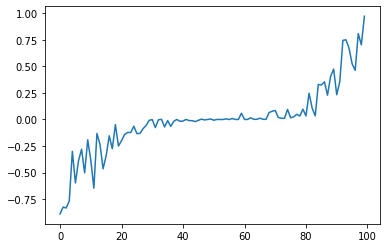

In [6]:
plt.plot(predictor.table)